Fitting sparse $s_0s$ sets to lower include lower $s_0s$ into the fit.
Fits always contain ten $s_0s$. We fitted the kinematic, cubic and quartic
weights for diferent sparse setups (take every second, every third, ... $s_0$).
We probe for $s_{min}<1GeV^2$.

In [2]:
exec(open('initNotebook.py').read())

# Load Data

In [4]:
weights = ['wCube', 'wKin', 'wQuart']
s0sMin = ['0.25', '0.475', '0.7', '0.925', '1.15', '1.375', '1.6', '1.95']

indexList = []
for weight in weights:
    for sMin in s0sMin:
        indexList.append(weight+sMin)


df = pd.read_csv('../../FESR/configurations/2019/sparseS0/fits.csv', header=1)
df.index = indexList
# exclude not converged fits
df = df[df['status']==0]
wKin = df[7:14]
wCube = df[0:7]
wQuart = df[14:21]
print(df.loc[: , ['chiDof', 'alpha', 'c6', 'c8']])

                 chiDof     alpha        c6        c8
wCube0.475   621.113598  0.251979  0.017404  0.002315
wCube0.7     101.318873  0.296483 -0.100862 -0.027107
wCube0.925     6.475990  0.317996 -0.168569 -0.032908
wCube1.15      6.237693  0.317627 -0.165367 -0.031522
wCube1.375     6.824519  0.316832 -0.156248 -0.026802
wCube1.6       6.738773  0.319508 -0.190680 -0.047847
wCube1.95      1.250837  0.326473 -0.317688 -0.143137
wKin0.475    221.543734  0.288498 -0.127403 -0.047502
wKin0.7       12.250365  0.321578 -0.204496  0.047725
wKin0.925      9.707789  0.315771 -0.166135  0.049673
wKin1.15       8.193081  0.316996 -0.192990  0.020896
wKin1.375      5.109344  0.322636 -0.346324 -0.164277
wKin1.6        2.499764  0.328066 -0.538454 -0.431821
wKin1.95       1.127803  0.323164 -0.305910 -0.007625
wQuart0.475  580.765056  0.233311  0.033408  0.004707
wQuart0.7    519.107169  0.254503  0.014151  0.001032
wQuart0.925  102.070431  0.294491 -0.060142 -0.014340
wQuart1.15    14.057825  0.3

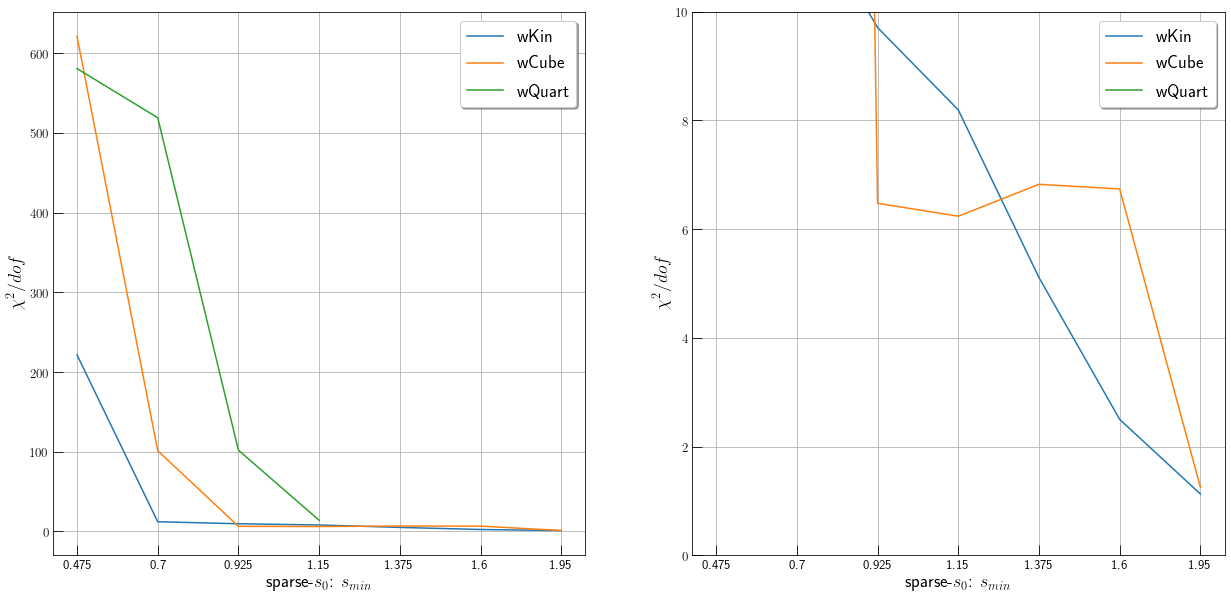

In [10]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(s0sMin[1:8], wKin['chiDof'], label='wKin')
axes[0].plot(s0sMin[1:8], wCube['chiDof'], label='wCube')
axes[0].plot(s0sMin[1:5], wQuart['chiDof'], label='wQuart')
axes[0].set_xlabel('sparse-$s_0$: $s_{min}$')
axes[0].set_ylabel('$\chi^2/dof$')
axes[0].legend()

axes[1].plot(s0sMin[1:8], wKin['chiDof'], label='wKin')
axes[1].plot(s0sMin[1:8], wCube['chiDof'], label='wCube')
axes[1].plot(s0sMin[1:5], wQuart['chiDof'], label='wQuart')
axes[1].set_ylim(0, 10)
axes[1].set_xlabel('sparse-$s_0$: $s_{min}$')
axes[1].set_ylabel('$\chi^2/dof$')
axes[1].legend()



We plotted the $\chi^2/dof$ for different $s_{min}$. The right plot is zoomed in. We note that for low $s_{min}$ ($s_0 < 1.15$) the $\chi^2/dof$ value is steep increasing. We also note that wQuart starts firtst to increase at $s_{min}=1.15$ followd by wCube at $s_{min}=0.925$ and finally wKin $s_{min}=0.7$. Consequently in "goodness of weight" wKin is the better weight, followd by WCube and finally wQuart. The $\chi^2/dof$ values are too high for almost all fits, but get better for higher $s_{min}$ values.

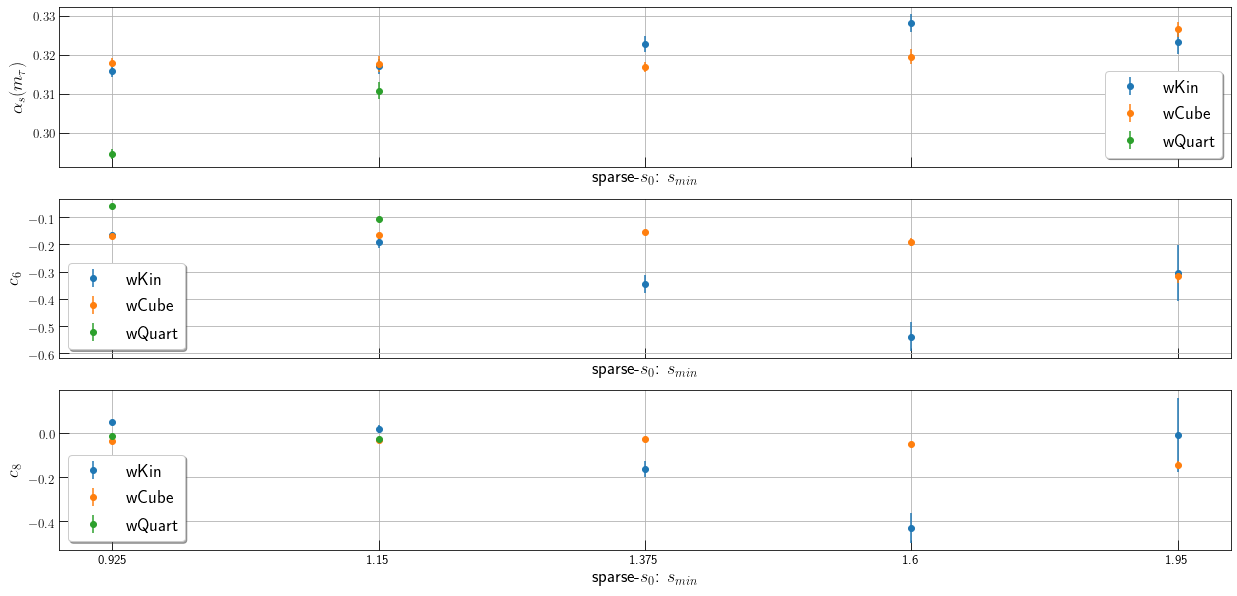

In [15]:
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].errorbar(s0sMin[3:8], wKin['alpha'][2:], yerr=wKin['alphaErr'][2:], label='wKin', linestyle='none', marker='o')
axes[0].errorbar(s0sMin[3:8], wCube['alpha'][2:], yerr=wCube['alphaErr'][2:], label='wCube', linestyle='none', marker='o')
axes[0].errorbar(s0sMin[3:5], wQuart['alpha'][2:], yerr=wQuart['alphaErr'][2:], label='wQuart', linestyle='none', marker='o')
axes[0].set_xlabel('sparse-$s_0$: $s_{min}$')
axes[0].set_ylabel(r'$\alpha_s(m_\tau)$')
axes[0].legend()

axes[1].errorbar(s0sMin[3:8], wKin['c6'][2:], yerr=wKin['c6Err'][2:], label='wKin', linestyle='none', marker='o')
axes[1].errorbar(s0sMin[3:8], wCube['c6'][2:], yerr=wCube['c6Err'][2:], label='wCube', linestyle='none', marker='o')
axes[1].errorbar(s0sMin[3:5], wQuart['c6'][2:], yerr=wQuart['c6Err'][2:], label='wQuart', linestyle='none', marker='o')
axes[1].set_xlabel('sparse-$s_0$: $s_{min}$')
axes[1].set_ylabel(r'$c_6$')
axes[1].legend()

axes[2].errorbar(s0sMin[3:8], wKin['c8'][2:], yerr=wKin['c8Err'][2:], label='wKin', linestyle='none', marker='o')
axes[2].errorbar(s0sMin[3:8], wCube['c8'][2:], yerr=wCube['c8Err'][2:], label='wCube', linestyle='none', marker='o')
axes[2].errorbar(s0sMin[3:5], wQuart['c8'][2:], yerr=wQuart['c8Err'][2:], label='wQuart', linestyle='none', marker='o')
axes[2].set_xlabel('sparse-$s_0$: $s_{min}$')
axes[2].set_ylabel(r'$c_8$')
axes[2].legend()

We plotted $\alpha_s$ for different sparse settings with each containing ten $s_0s$ moments for different weights, where the smalles $s_0$-value is given as x-tick label. We can see that the majority of $\alpha_s$ values is clustered in the interval of [0.315, 0.325]. The weights wKin and wCube show similar $\alpha_s$ values, whereas wQuart produces far smaller $\alpha_s$ values. Surprinsingly the wQuart fits only converged for lower $s_{min}$, which can be seen for the missing data points starting by $s_{min} = 1.375GeV^2$.